In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hdu = fits.open('E:/Starburst/BPT_Data/bpt_tayf_fiti/bpt_catolog_v2.fits')

In [3]:
# NII/Ha için 

nii_ew = hdu[1].data['NII_Ew']
halpha_ew = hdu[1].data['H_alpha_Ew']
oiii_ew = hdu[1].data['OIII_EW']
hbeta_ew = hdu[1].data['H_beta_Ew']

mask = (nii_ew != 0) & (halpha_ew != 0) & (oiii_ew != 0) & (hbeta_ew != 0)

nii_ew = nii_ew[mask]
halpha_ew = halpha_ew[mask]
oiii_ew = oiii_ew[mask]
hbeta_ew = hbeta_ew[mask]

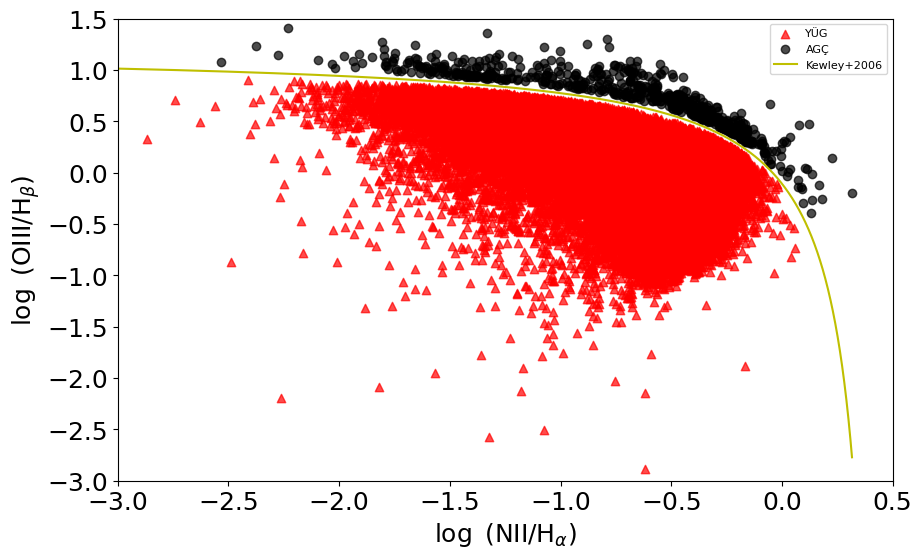

In [4]:
# NII/Ha ve OIII/Hb değerlerini alıyoruz
nii_ew = hdu[1].data['NII_Ew']
halpha_ew = hdu[1].data['H_alpha_Ew']
oiii_ew = hdu[1].data['OIII_EW']
hbeta_ew = hdu[1].data['H_beta_Ew']

# Logaritma işlemi sırasında sıfırdan büyük değerlere dikkat edelim
mask = (nii_ew > 0) & (halpha_ew > 0) & (oiii_ew > 0) & (hbeta_ew > 0)
nii_ew = nii_ew[mask]
halpha_ew = halpha_ew[mask]
oiii_ew = oiii_ew[mask]
hbeta_ew = hbeta_ew[mask]

# Logaritmik oranları hesaplıyoruz
nii_ha = np.log10(nii_ew / halpha_ew)
oiii_hb = np.log10(oiii_ew / hbeta_ew)

# Fit çizgisini tanımlıyoruz
def fit_a(x):
    y = (0.61 / (x - 0.47)) + 1.19
    return y

# Fit çizgisi için x ve y değerlerini belirliyoruz
x = np.linspace(nii_ha[~np.isnan(nii_ha)].min(), nii_ha[~np.isnan(nii_ha)].max(), 8000)
y = fit_a(x)

# Tolerans değerini tanımlıyoruz (epsilon)
epsilon = 6.284e-2  # Hassasiyet için biraz daha büyük bir tolerans değeri kullanıyoruz

# Fit eğrisinin altında ve üstünde kalan galaksileri ayırıyoruz
fit_values = fit_a(nii_ha)
below_fit = oiii_hb < (fit_values - epsilon)  # Fit çizgisinin altında kalanlar (Starburst galaksiler)
above_fit = oiii_hb > (fit_values + epsilon)  # Fit çizgisinin üstünde kalanlar

# Fit çizgisine tam olarak eşit olanlar (epsilon dahilinde)
exact_fit = np.abs(oiii_hb - fit_values) <= epsilon

# Galaksi sayıları
num_below_fit = np.sum(below_fit)
num_above_fit = np.sum(above_fit)
num_exact_fit = np.sum(exact_fit)

#print(f"Fit eğrisinin altında kalan galaksi sayısı (Starburst): {num_below_fit}")
#print(f"Fit eğrisinin üstünde kalan galaksi sayısı: {num_above_fit}")
#print(f"Fit eğrisine tam eşit olan galaksi sayısı (toleransla): {num_exact_fit}")

# Grafiği Çizdiriyoruz
fig3=plt.figure(figsize=(10, 6))  # Grafik boyutunu artırdım

# Fit çizgisinin altında kalan Starburst galaksilerini kırmızı ve üçgen sembollerle gösteriyoruz
plt.scatter(nii_ha[below_fit], oiii_hb[below_fit], color='red', alpha=0.7, label='YÜG', marker='^')

# Fit çizgisinin üstünde kalan diğer galaksileri siyah ile gösteriyoruz
plt.scatter(nii_ha[above_fit], oiii_hb[above_fit], color='black', alpha=0.7, label='AGÇ')

# Fit çizgisini sarı ve kesikli bir çizgi olarak çiziyoruz
plt.plot(x, y, color='y', linestyle='-', label='Kewley+2006')

# Eksen etiketleri ve grafik sınırları
plt.xlabel(r'$\log\ (\mathrm{NII}/\mathrm{H}_\alpha)$', fontsize=18)  # X eksenini düzenledim
plt.ylabel(r'$\log\ (\mathrm{OIII}/\mathrm{H}_\beta)$', fontsize=18)  # Y eksenini düzenledim
plt.xticks(fontsize=18)  # X eksenindeki yazıların boyutu
plt.yticks(fontsize=18)  # Y eksenindeki yazıların boyutu
#plt.gcf().set_size_inches(10,6)

# X ve Y ekseninin limitleri
plt.xlim(-3, 0.5)
plt.ylim(-3, 1.5)


# Grafik Düzeni
plt.legend(fontsize=8, loc='upper right') 

# Grafik Düzeni
#plt.tight_layout()

#kaydedelim

plt.savefig('C:/Desktop/bpt_oiii_hb_and_nii_ha.png', dpi=200) #.png, .pdf

# Grafik çıktısını gösterelim
plt.show()